# Synonym Expansion

The basic idea is to generate synonyms of keywords and help them in the expansion of search query so as to give more relevant results.
E.g. I know a song vaguely whose lyrics are **"the sky is so *up*"** . Here I don't remember the exact last word but vaguely remember that the word is similar to up. So the search result should be **the sky is so high** **the sky is so above** , **the sky is so high**

This notebook shows the synonym generation. Starting block shows the practice and handson on basic NLP tasks. Actual training of Neural Network starts from **"Billboard Lyrics Dataset"** caption which is some where down in the middle.


# Generating synonyms using wordnet vocabulary

Here, we are trying to generate synonyms using wordnet vocabulary. However, this idea has its limitation as this dictionary is manually build and cannot take into account the slangs or abbreviations like AKA, coz, bcoz etc.

In [47]:
import nltk
import torch
from nltk.corpus import wordnet

In [51]:
array_ant=[]
array_syn=[]

In [37]:
wordnet.synsets("happy")

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [38]:
wordnet.synsets("good")

[Synset('good.n.01'),
 Synset('good.n.02'),
 Synset('good.n.03'),
 Synset('commodity.n.01'),
 Synset('good.a.01'),
 Synset('full.s.06'),
 Synset('good.a.03'),
 Synset('estimable.s.02'),
 Synset('beneficial.s.01'),
 Synset('good.s.06'),
 Synset('good.s.07'),
 Synset('adept.s.01'),
 Synset('good.s.09'),
 Synset('dear.s.02'),
 Synset('dependable.s.04'),
 Synset('good.s.12'),
 Synset('good.s.13'),
 Synset('effective.s.04'),
 Synset('good.s.15'),
 Synset('good.s.16'),
 Synset('good.s.17'),
 Synset('good.s.18'),
 Synset('good.s.19'),
 Synset('good.s.20'),
 Synset('good.s.21'),
 Synset('well.r.01'),
 Synset('thoroughly.r.02')]

In [39]:
wordnet.synsets("good")[4].lemmas()[0].antonyms()

[Lemma('bad.a.01.bad')]

In [52]:
for vayn in wordnet.synsets("high"):
    for l in vayn.lemmas():
        array_syn.append(l.name())
        if l.antonyms():
            print(l.antonyms)
            array_ant.append(l.antonyms()[0].name())

<bound method Lemma.antonyms of Lemma('high.n.01.high')>
<bound method Lemma.antonyms of Lemma('high.n.03.high')>
<bound method Lemma.antonyms of Lemma('high.a.01.high')>
<bound method Lemma.antonyms of Lemma('high.a.02.high')>
<bound method Lemma.antonyms of Lemma('high.a.04.high')>


In [41]:
print(set(array_ant))

{'low_spirits', 'low'}


In [53]:
#synonyms of sky using WordNet(manual thesaurus)
print(set(array_syn))

{'senior_high_school', 'in_high_spirits', 'highschool', 'senior_high', 'high_gear', 'high_school', 'eminent', 'mellow', 'high-pitched', 'high_up', 'gamy', 'high', 'richly', 'heights', 'luxuriously', 'gamey'}


# PyTorch Intro - Practice

This is a basic intro of PyTorch which I tried to learnt and tried to see how it works.

In [10]:
from torch.nn import Embedding
n_embed, dim =10,4

In [11]:
emb_1=Embedding(n_embed,dim)

In [11]:
emb_1.weight

Parameter containing:
tensor([[-0.1784,  0.7705,  0.2032,  0.2878],
        [-0.7470, -0.1568,  0.3180, -0.9236],
        [-1.2563, -0.8695,  0.5425, -1.1144],
        [ 1.1738,  0.3326, -0.0081, -1.7108],
        [-0.8207, -1.0562,  1.3394, -1.7591],
        [-1.7570, -0.5781, -0.1787,  0.1832],
        [-1.3027, -1.2986, -1.3116, -0.4961],
        [-0.6315,  0.3761, -1.3315, -0.1068],
        [ 0.2864, -1.2737, -0.3559,  1.5387],
        [ 0.7139,  1.1442,  1.8009, -1.2358]], requires_grad=True)

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)
# FloatTensor containing pretrained weights
weight = torch.FloatTensor([[1, 2.3, 3], [4, 5.1, 6.3]])
embedding = nn.Embedding.from_pretrained(weight)
# Get embeddings for index 1
input = torch.LongTensor([1])
embedding(input)

tensor([[4.0000, 5.1000, 6.3000]])

In [22]:
import gensim
#model = gensim.models.KeyedVectors.load_word2vec_format('path/to/file')
#weights = torch.FloatTensor(model.vectors)

In [24]:
sentence = "the quick brown fox jumped over the lazy dog"
words = sentence.split(' ')
print(words)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


In [25]:
vocab1 = list(set(words))
print(vocab1)

['fox', 'over', 'the', 'jumped', 'dog', 'lazy', 'brown', 'quick']


In [29]:
# Number of words in our vocabulary
len(vocab1)

NameError: name 'vocab1' is not defined

# Basics of NLP - One Hot Encoding

In [27]:
# Convert words to indexes
word_to_ix1 = {word: i for i, word in enumerate(vocab1)}
print(word_to_ix1)

{'fox': 0, 'over': 1, 'the': 2, 'jumped': 3, 'dog': 4, 'lazy': 5, 'brown': 6, 'quick': 7}


In [28]:
from torch.nn.functional import one_hot

words = torch.tensor([word_to_ix1[w] for w in vocab1], dtype=torch.long)

one_hot_encoding = one_hot(words)
print(vocab1)
print(one_hot_encoding)

['fox', 'over', 'the', 'jumped', 'dog', 'lazy', 'brown', 'quick']
tensor([[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1]])


The issue with sparse one-hot encoding is that the vectors are very large and we have a very sparse representation of the vectors. As you can see there are a lot of zeros. For example, the popular data set WikiText-103 has 267,000 words in the vocabulary. This means around 267,000 zeros in each vector with one-hot encoding.

We should try to find a smaller encoding for our dataset. Let's try a denser vector using a Word Embedding.

# Basics Practice NLP

In [ ]:
# A Word embedding is a learned representation for text where words that have the same meaning have a similar representation.
# Since neural network can't take inputs as words but only some numerics, so we can say it's kind of numeric representation of words.
# We can visualise word embeddings using t-SNE or PCA.

In [35]:

# Context is the number of words we are using as a context for the next word we want to predict
CONTEXT_SIZE = 2

# Embedding dimension is the size of the embedding vector
EMBEDDING_DIM = 10

# Size of the hidden layer
HIDDEN_DIM = 256

In [151]:
#Training on small dataset
# We will use Shakespeare Sonnet 2
test_sentence = """Tomorrow, and tomorrow, and tomorrow,
Creeps in this petty pace from day to day,
To the last syllable of recorded time;
And all our yesterdays have lighted fools
The way to dusty death. Out, out, brief candle!
Life's but a walking shadow, a poor player,
That struts and frets his hour upon the stage,
And then is heard no more. It is a tale
Told by an idiot, full of sound and fury,
Signifying nothing.
""".lower().split()

In [152]:
test_sentence

['tomorrow,',
 'and',
 'tomorrow,',
 'and',
 'tomorrow,',
 'creeps',
 'in',
 'this',
 'petty',
 'pace',
 'from',
 'day',
 'to',
 'day,',
 'to',
 'the',
 'last',
 'syllable',
 'of',
 'recorded',
 'time;',
 'and',
 'all',
 'our',
 'yesterdays',
 'have',
 'lighted',
 'fools',
 'the',
 'way',
 'to',
 'dusty',
 'death.',
 'out,',
 'out,',
 'brief',
 'candle!',
 "life's",
 'but',
 'a',
 'walking',
 'shadow,',
 'a',
 'poor',
 'player,',
 'that',
 'struts',
 'and',
 'frets',
 'his',
 'hour',
 'upon',
 'the',
 'stage,',
 'and',
 'then',
 'is',
 'heard',
 'no',
 'more.',
 'it',
 'is',
 'a',
 'tale',
 'told',
 'by',
 'an',
 'idiot,',
 'full',
 'of',
 'sound',
 'and',
 'fury,',
 'signifying',
 'nothing.']

In [153]:
# Build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])

vocab2 = list(set(test_sentence))
word_to_ix2 = {word: i for i, word in enumerate(vocab2)}

# Show what a trigram looks like

[(['tomorrow,', 'and'], 'tomorrow,'), (['and', 'tomorrow,'], 'and'), (['tomorrow,', 'and'], 'tomorrow,')]


### N - Gram Language Model

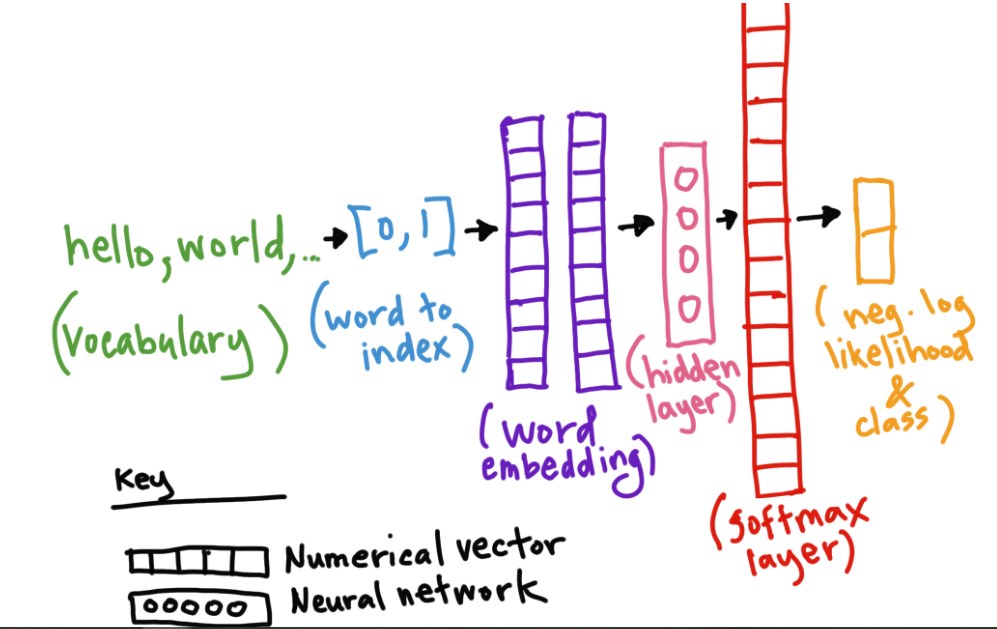

# Basics - Word Embedding using PyTorch

In [154]:
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy

class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, HIDDEN_DIM)
        self.linear2 = nn.Linear(HIDDEN_DIM, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs

In [155]:
learning_rate = 0.001
losses = []
loss_function = nn.NLLLoss()  # negative log likelihood
model = NGramLanguageModeler(len(vocab2), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [156]:
from tqdm import tqdm

for epoch in range(25):
    total_loss = 0

    iterator = tqdm(trigrams)
    for context, target in iterator:
        # (['When', 'forty'], 'winters')
        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix2[w] for w in context], dtype=torch.long)

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        loss = loss_function(log_probs, torch.tensor([word_to_ix2[target]], dtype=torch.long))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
        iterator.set_postfix(loss=float(loss))
    losses.append(total_loss)
    # add progress bar with epochs

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<00:00, 162.58it/s, loss=3.97]


In [157]:
# Check the structure of our model here
model.eval()

NGramLanguageModeler(
  (embeddings): Embedding(59, 10)
  (linear1): Linear(in_features=20, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=59, bias=True)
)

In [43]:
#predicting the next word using context
with torch.no_grad():
    context = ['tomorrow,', 'and']
    context_idxs = torch.tensor([word_to_ix2[w] for w in context], dtype=torch.long)
    pred = model(context_idxs)
    print(pred)
    index_of_prediction = numpy.argmax(pred)
    print(vocab2[index_of_prediction])

tensor([[-3.7671, -5.0826, -5.3286, -4.7384, -5.2242, -4.8980, -4.7127, -4.4178,
         -4.8505, -4.8959, -3.2637, -4.3162, -5.1827, -5.2274, -3.5395, -5.6422,
         -5.6677, -4.1667, -5.2351, -4.2126, -5.6689, -4.9100, -5.3901, -5.4039,
         -6.1996, -5.2815, -4.7323, -4.5031, -4.7173, -4.8648, -4.3539, -4.9963,
         -4.6038, -5.1256, -4.4080, -5.3007, -5.3182, -5.8690, -4.6100, -5.3648,
         -5.4968, -5.1615, -5.9957, -5.7366, -5.5156, -3.6805, -3.5745, -5.5850,
         -5.3037, -0.6923, -5.8786, -5.5310, -4.8180, -5.5837, -4.9483, -4.8371,
         -4.7760, -5.0435, -5.3918]])
tomorrow,


# Basics of NLP - Continuous Bag of Words

In [44]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

# By deriving a set from `raw_text`, we deduplicate the array
vocab3 = list(set(raw_text))
vocab_size = len(vocab3)

word_to_ix3 = {word: i for i, word in enumerate(vocab3)}
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print(data[:5])

[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]


In [45]:
# create your model and train.  here are some functions to help you make
# the data ready for use by your module

def make_context_vector(context, word_to_ix3):
    idxs = [word_to_ix3[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

make_context_vector(data[0][0], word_to_ix3)  # example

tensor([ 1, 15, 19, 30])

In [46]:
class CBOW(nn.Module):
    def __init__(self):
        pass

    def forward(self, inputs):
        pass

In [54]:
#!pip install --upgrade tensorflow-hub

In [57]:
# import necessary libraries
#trying to use ELMO
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

# Load pre trained ELMo model
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)

# create an instance of ELMo
embeddings = elmo(
	[
		"I love to watch TV",
		"I am wearing a wrist watch"
	],
	signature="default",
	as_dict=True)["elmo"]
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# Print word embeddings for word WATCH in given two sentences
print('Word embeddings for word WATCH in first sentence')
print(sess.run(embeddings[0][3]))
print('Word embeddings for word WATCH in second sentence')
print(sess.run(embeddings[1][5]))


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Word embeddings for word WATCH in first sentence
[ 0.1408 -0.1579 -0.0095 ...  0.4301 -0.5289  0.0633]
Word embeddings for word WATCH in second sentence
[-0.0821  0.0105 -0.0145 ...  0.4871 -0.5446  0.5262]


# Billboard lyrics Dataset
## Generating synonyms using Billboard lyrics dataset
###  A Small dataset

In [1]:
!pip install python-Levenshtein

  Using cached python-Levenshtein-0.12.2.tar.gz (50 kB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Madhusudan\anaconda3\envs\pytorch\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Madhusudan\\AppData\\Local\\Temp\\pip-install-rda9di_5\\python-levenshtein\\setup.py'"'"'; __file__='"'"'C:\\Users\\Madhusudan\\AppData\\Local\\Temp\\pip-install-rda9di_5\\python-levenshtein\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Madhusudan\AppData\Local\Temp\pip-wheel-pb0dpghh'
       cwd: C:\Users\Madhusudan\AppData\Local\Temp\pip-install-rda9di_5\python-levenshtein\
  Complete output (27 lines):
  running bdist_wheel
  running build
  running build_py


  Running setup.py clean for python-Levenshtein
Failed to build python-Levenshtein
    Running setup.py install for python-Levenshtein: started
    Running setup.py install for python-Levenshtein: finished with status 'error'


  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\Levenshtein
  copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-3.8\Levenshtein
  copying Levenshtein\__init__.py -> build\lib.win-amd64-3.8\Levenshtein
  running egg_info
  writing python_Levenshtein.egg-info\PKG-INFO
  writing dependency_links to python_Levenshtein.egg-info\dependency_links.txt
  writing entry points to python_Levenshtein.egg-info\entry_points.txt
  writing namespace_packages to python_Levenshtein.egg-info\namespace_packages.txt
  writing requirements to python_Levenshtein.egg-info\requires.txt
  writing top-level names to python_Levenshtein.egg-info\top_level.txt
  reading manifest file 'python_Levenshtein.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  writing manifest file 'python_Levenshtein.egg-info\SOURCES.txt'
  copying Levenshtein\_levenshtein.c -> build\lib.win-amd64-3.8\Levenshtein
  copying Levenshtein\_levenshtein.h -> build\lib.win-amd64-3.8

In [2]:
#importing gensim library which is quite famous library for NLP
#reading the top 100 songs lyrics of 50 years dataset
import gensim.models
import pandas as pd
df = pd.read_csv("C://Users//Madhusudan//Downloads//billboard_lyrics_1964-2015.csv",encoding="latin-1")


    building 'Levenshtein._levenshtein' extension
    error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
    ----------------------------------------
ERROR: Command errored out with exit status 1: 'C:\Users\Madhusudan\anaconda3\envs\pytorch\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Madhusudan\\AppData\\Local\\Temp\\pip-install-rda9di_5\\python-levenshtein\\setup.py'"'"'; __file__='"'"'C:\\Users\\Madhusudan\\AppData\\Local\\Temp\\pip-install-rda9di_5\\python-levenshtein\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\Madhusudan\AppData\Local\Temp\pip-record-42i8mq7f\install-record.txt' --single-version-externally-managed --compile --install-headers 'C:\Users\Madhusudan\anaconda3\envs\pytor

In [3]:
sentences=a#, "I love my cat", "I love you babe", "You love my dog!", "I love my dog too!!"]
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

NameError: name 'a' is not defined

In [ ]:
word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1 
embed_size = 100

wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in a]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

In [ ]:
from keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

In [ ]:
df.head()

In [ ]:
df1 = df[['Lyrics']]

In [ ]:
df['class']='lyrics'

In [ ]:
#remove null columns
df1= df1.dropna(subset=['Lyrics'])

In [ ]:
#pre-processes i.e. remove punctuation and remove stopwords like I. It also lowercases charcters

lyrics = df1.Lyrics.apply(gensim.utils.simple_preprocess)
lyrics

In [ ]:
#setting the model parameters for word2vec model
model=gensim.models.Word2Vec(window=10, min_count=2, workers=4)

In [ ]:
#building voacbulary of unique words
model.build_vocab(lyrics, progress_per = 1000)

In [ ]:
model.epochs

In [ ]:
model.corpus_count

In [ ]:
#training the model
model.train(lyrics, total_examples = model.corpus_count, epochs = 10)

In [228]:
#saving the model
model.save("./word2vec-billboard.model")

In [229]:
model.wv.most_similar("sky")

[('stars', 0.742691159248352),
 ('sea', 0.6411312222480774),
 ('above', 0.6297875642776489),
 ('skies', 0.6213579773902893),
 ('cloud', 0.6060800552368164),
 ('ocean', 0.6021345257759094),
 ('clouds', 0.5974225401878357),
 ('beneath', 0.5972083806991577),
 ('sun', 0.5938804745674133),
 ('moon', 0.5874178409576416)]

# Review Sports

This dataset is of amazon reviews downloaded from stanford site.
This data is used for training of the model using word2vec algorithm. It uses **skipgram** model

In [4]:
df_sports = pd.read_json("C://Users//Madhusudan//Downloads//reviews_Sports_and_Outdoors_5.json", lines=True)

In [5]:
df_sports.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5,Woks very good,1390694400,"01 26, 2014"
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5,Works as well as the factory tool,1328140800,"02 2, 2012"
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4,"It's a punch, that's all.",1330387200,"02 28, 2012"
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4,It's a punch with a Glock logo.,1328400000,"02 5, 2012"
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4,"Ok,tool does what a regular punch does.",1366675200,"04 23, 2013"


In [6]:
df_sports.shape

(296337, 9)

In [19]:
df_sports['class']="sports"

In [205]:
review_text = df_sports.reviewText.apply(gensim.utils.simple_preprocess)

In [206]:
review_text

0                                                         [this, came, in, on, time, and, am, veru, happy, with, it, haved, used, it, already, and, it, makes, taking, out, the, pins, in, my, glock, very, easy]
1         [had, factory, glock, tool, that, was, using, for, my, glock, and, ve, since, lost, it, and, had, needed, another, since, ve, used, ghost, products, prior, and, know, that, they, are, reliable, ha...
2         [if, you, don, have, punch, or, would, like, to, have, one, in, your, glock, bag, this, is, okay, the, butt, end, of, it, is, handy, for, pushing, pins, back, in, place, if, you, already, have, pu...
3                     [this, works, no, better, than, any, punch, you, would, find, at, the, hardware, store, actually, think, you, would, be, better, with, regular, punch, as, it, has, more, to, hold, on, to]
4         [purchased, this, thinking, maybe, need, special, tool, to, easily, pop, off, my, base, plates, for, my, magazines, but, it, does, the, same, as, regu

In [7]:
#setting the model parameters
model=gensim.models.Word2Vec(window=5,min_count=2,workers=4, sg=1)

In [215]:
#building voacbulary of unique words
model.build_vocab(review_text, progress_per =1000)

In [209]:
#train word2vec model by using reviews
model.train(review_text,total_examples= model.corpus_count, epochs =5)

(91339452, 121496535)

In [210]:
model.save("./word2vec-review-dataset.model")

In [211]:
#TAKING COSINE SIMILARITY and finding synonyms
model.wv.most_similar("awful")

[('terrible', 0.7917032837867737),
 ('horrible', 0.7829708456993103),
 ('horrid', 0.7278502583503723),
 ('bad', 0.7001040577888489),
 ('horrendous', 0.6918444037437439),
 ('abysmal', 0.6703478097915649),
 ('funny', 0.6461908221244812),
 ('overpowering', 0.6375795602798462),
 ('awfull', 0.6367093920707703),
 ('nauseating', 0.6345282793045044)]

 'awful' and find similarities between the following word tuples: ('good', 'great'), ('slow','steady')"

In [212]:
model.wv.similarity(w1="great",w2="good")

0.8263506

In [213]:
model.wv.similarity(w1="slow",w2="steady")

0.5350166

In [214]:
#finding synonyms using the model generated using Neural Network
model.wv.most_similar("high")

[('low', 0.8396738767623901),
 ('higher', 0.7355847358703613),
 ('highest', 0.7288464903831482),
 ('decent', 0.6166417598724365),
 ('belies', 0.6091939210891724),
 ('lesser', 0.6070549488067627),
 ('good', 0.6058477759361267),
 ('durablecons', 0.6053863763809204),
 ('materialscons', 0.6019201278686523),
 ('respectable', 0.5958444476127625)]

I got to know that there are few more techniques like GloVe and Elmo to do this. I'll be trying that as well.

# Classification task of Airbnb and Sports Reviews

In [13]:
airbnb_url = 'https://www.kaggle.com/tylerx/discover-sentiment-in-airbnb-reviews/data?select=reviews_dec18.csv'

In [11]:
from urllib.request import urlretrieve

In [14]:
urlretrieve(airbnb_url, 'airbnb.csv')

('airbnb.csv', <http.client.HTTPMessage at 0x12dd0ae8340>)

In [1]:
import pandas as pd

In [2]:
airbnb_df = pd.read_csv('C:\\Users\\Madhusudan\\Downloads\\reviews_dec18.csv',error_bad_lines=False, engine='python')

In [3]:
airbnb_df.shape

(486920, 6)

In [17]:
airbnb_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9835,279854,2011-05-24,560832,Miriam,"Very hospitable, much appreciated.\r\n"
1,9835,3640746,2013-02-26,5143343,Michelle,A beautiful house in a lovely quiet neighbourh...
2,9835,23731188,2014-12-08,2478713,Karyn,This was my first time using airbnb and it was...
3,9835,46588875,2015-09-12,26184717,Rosalind,I was visiting Melbourne to spend time with my...
4,10803,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay's a...


In [18]:
airbnb_df.comments[2]

"This was my first time using airbnb and it was great. I was going to a party in an area that didn't have much accommodation around and which was booked being Xmas anyway (and I would have needed to get a cab too) - so it was great to find a room within walking distance.\r\n\r\nManju the host was lovely and the room was as described. A very pleasant and easy experience as a whole."

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
#from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
airbnb_df.isnull().values.any()

In [ ]:
airbnb_df.shape

In [181]:
airbnb_df['class']="airbnb"

In [ ]:
airbnb_df.head()

In [183]:
song_df=df[['Lyrics','class']]
song_df.rename(columns={'Lyrics':'wordings'},inplace=True)

C:\Users\Madhusudan\anaconda3\envs\pytorch\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [184]:
sports_df=df_sports[['reviewText','class']]
sports_df.rename(columns={'reviewText':'wordings'},inplace=True)

In [185]:
airbnb_df = airbnb_df[['comments','class']]
airbnb_df.rename(columns={'comments':'wordings'},inplace=True)

In [269]:
#df_sports[['reviewText','class']].append(airbnb_df[['comments','class']],ignore_index=True,
 #   verify_integrity=True)

In [233]:
df_combined=pd.concat([sports_df,airbnb_df])

In [188]:
df_combined[df_combined['class']=='lyrics']

,wordings,class


In [189]:
import seaborn as sns


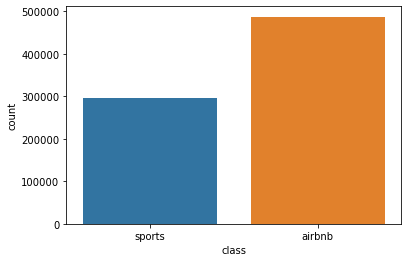

In [190]:
#looking at the count of both classes
sns.countplot(x='class', data=df_combined)

In [191]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [192]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', str(text))

In [193]:
X = []
sentences = list(df_combined['wordings'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [194]:
X[3]

'This works no better than any punch you would find at the hardware store Actually think you would be better with regular punch as it has more to hold on to '

In [195]:
y = df_combined['class']

y = np.array(list(map(lambda x: 1 if x=="airbnb" else 0, y)))

In [196]:
y[25555]
df_combined.iloc[25555]

wordings    I laughed when my girlfriend bought a titanium...
class                                                  sports
Name: 25555, dtype: object

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [198]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [199]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100


X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [200]:
#using GLove embeddings
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('C:\\Users\\Madhusudan\\Downloads\\glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [264]:
vocab_size

135886

In [201]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [202]:
embedding_matrix.shape

(135886, 100)

In [203]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [204]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.layers import InputLayer

In [205]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(tf.keras.layers.LSTM(128))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [206]:


print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          13588600  
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 13,705,977
Trainable params: 117,377
Non-trainable params: 13,588,600
_________________________________________________________________
None


In [207]:
#1 epoch time equals 25 mins and total there were 6 epochs
history = model.fit(X_train, y_train, batch_size=128, epochs=2, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/2
3917/3917 [==============================] - 1593s 407ms/step - loss: 0.1704 - acc: 0.9224 - val_loss: 0.0190 - val_acc: 0.9949
Epoch 2/2
4896/4896 [==============================] - 324s 66ms/step - loss: 0.0145 - acc: 0.9958


In [208]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.014522927813231945
Test Accuracy: 0.995837926864624


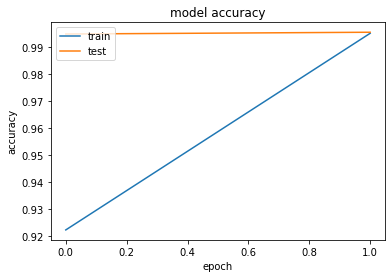

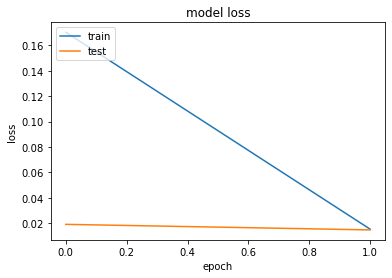

In [209]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [255]:
instance = X[48610]
print(instance)
type(instance)

I bought this recently and have been very pleased with it The material isn cheap and like the detachable shoulder strap Internally there are divider pockets that keep things organized by type of injury but they are removeable if you just want one big main pocket There are also seperate pockets on each side and the top flap closes with buckles and also velcro Seeing as though the only negative review is coming from someone who assumed they were getting fully loaded trauma kit for about bucks and admitted not reading single word about it d say you can go wrong 


str

In [211]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[0.19019887]], dtype=float32)

In [213]:
preds = model.predict(X_test)

In [221]:
pred=model.predict_classes(X_test)

In [222]:
pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [215]:
preds

array([[1.0198291e-04],
       [9.0357661e-04],
       [9.9937236e-01],
       ...,
       [9.9924481e-01],
       [9.9880350e-01],
       [6.5085071e-05]], dtype=float32)

In [250]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test, pred)

In [242]:
df_cm=pd.DataFrame(cm, index=['sports','airbnb'],columns=['sports','airbnb'])

In [243]:
df_cm.head()

,sports,airbnb
sports,59025,166
airbnb,486,96975


In [236]:
sum(df_combined['class']=='sports')

296337

In [235]:
df_combined.head()

,wordings,class
0,This came in on time and I am veru happy with ...,sports
1,I had a factory Glock tool that I was using fo...,sports
2,If you don't have a 3/32 punch or would like t...,sports
3,This works no better than any 3/32 punch you w...,sports
4,I purchased this thinking maybe I need a speci...,sports


In [241]:
sum(y_test)

97461

In [246]:
len(y_test)-sum(y_test)

59191

In [252]:
report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     59191
           1       1.00      1.00      1.00     97461

    accuracy                           1.00    156652
   macro avg       1.00      1.00      1.00    156652
weighted avg       1.00      1.00      1.00    156652



In [253]:
#https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras

In [262]:
instance='The roooms were neat and clean and the host was super cool'
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)
#model.predict("The roooms were neat and clean and the host was super cool")

array([[0.77223504]], dtype=float32)

In [257]:
model.save("./review-classification.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./review-classification.model\assets


In [267]:
model.save('review-classification.h5')

In [260]:
df_sports.reviewText[2]

"If you don't have a 3/32 punch or would like to have one in your Glock bag, this is okay.  The butt end of it is handy for pushing pins back in place.  If you already have a 3/32 punch and don't need another, don't both with this one."

# Contextual Embedding using BERT

In [23]:
airbnb_comments = airbnb_df[['comments']]

In [27]:
!pip install -U sentence-transformers

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

torchvision 0.5.0+cpu requires torch==1.4.0+cpu, but you'll have torch 1.9.0 which is incompatible.
torchaudio 0.7.2 requires torch==1.7.1, but you'll have torch 1.9.0 which is incompatible.
huggingface-hub 0.0.13 requires packaging>=20.9, but you'll have packaging 20.4 which is incompatible.
transformers 4.8.2 requires huggingface-hub==0.0.12, but you'll have huggingface-hub 0.0.13 which is incompatible.



  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)
  Using cached sacremoses-0.0.45-py3-none-any.whl (895 kB)
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126713 sha256=afbf782c32fdba679b0ce0e9169fda3699aba396d424a5f8a386bb257794893f
  Stored in directory: c:\users\madhusudan\appdata\local\pip\cache\wheels\8c\b7\50\451c9a52a337aac5521dbc10544a69e1447d28012feba30742
Successfully built sentence-transformers
  Attempting uninstall: torch
    Found existing installation: torch 1.4.0+cpu
    Uninstalling torch-1.4.0+cpu:
      Successfully uninstalled torch-1.4.0+cpu


In [30]:

from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')


In [29]:
from nltk.corpus import stopwords

In [33]:
import re

In [35]:
#documents_df=pd.DataFrame(documents,columns=['documents'])

# removing special characters and stop words from the text
stop_words=stopwords.words('english')
airbnb_comments['airbnb_cleaned']=airbnb_comments.comments.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in str(x).split() if re.sub(r'[^a-zA-Z]',' ',w).lower() not in stop_words_l) )


<ipython-input-35-1138266eb1bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_comments['airbnb_cleaned']=airbnb_comments.comments.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in str(x).split() if re.sub(r'[^a-zA-Z]',' ',w).lower() not in stop_words_l) )


In [ ]:

airbnb_embeddings = sbert_model.encode(airbnb_comments['airbnb_cleaned'])

pairwise_similarities=cosine_similarity(airbnb_embeddings)
pairwise_differences=euclidean_distances(airbnb_embeddings)

most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')